In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data() 
xtrain.shape,xtest.shape
#It gives size of train set i.e. 50000 and the channel means here image is of 32*32 pixels and rgb channel

170508288/170498071 [==============================] - 351s 2us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
print(ytrain.shape)#shape is 1 
ytrain[:5]#Here are 10 classes available so o/p betweeen 0 and 9

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
ytrain = ytrain.reshape(-1,)#convert in 1D
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
"""print(xtrain[0])
plt.imshow(xtrain[0])"""

def plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

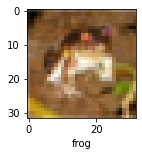

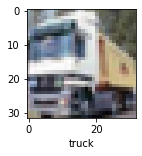

In [16]:
plot(xtrain,ytrain,0)
plot(xtrain,ytrain,1)

In [19]:
xtrain[0]#Normalise piels b/w 0 and 1

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
xtrain = xtrain/255
xtest = xtest/255

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#sparse_categorical_crossentropy used for value as y is between 0 and 9,categorical_crossentropy is used for 1 hot encoder

ann.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.8114 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6213 - accuracy: 0.4296
Epoch 3/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5408 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4806 - accuracy: 0.4791
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4305 - accuracy: 0.4973


In [26]:
ann.evaluate(xtest,ytest)

313/313 [==============================] - 4s 12ms/step - loss: 1.4678 - accuracy: 0.4796


[1.4678022861480713, 0.4796000123023987]

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(xtest)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report :\n',classification_report(ytest,y_pred_classes))

Classification report :
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.54      0.66      0.60      1000
           2       0.43      0.30      0.36      1000
           3       0.34      0.36      0.35      1000
           4       0.49      0.28      0.36      1000
           5       0.37      0.43      0.40      1000
           6       0.62      0.39      0.48      1000
           7       0.48      0.59      0.53      1000
           8       0.63      0.59      0.61      1000
           9       0.42      0.68      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



So in ann here accuracy is very less(around 47%).So we use CNN for images
Also we have dense(deep) layers same in cnn but convolutional layer(cnn+relu+pool) added

In [30]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)), 
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    #softmax normalise the probablity activation not.  Suppose o/p in activation is 1:.45    2:0.67,in softmax it is 0.45/0.45+0.67 for class 1
])

In [31]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4682 - accuracy: 0.4759
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1212 - accuracy: 0.6090
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9906 - accuracy: 0.6549
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9111 - accuracy: 0.6832
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8475 - accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7936 - accuracy: 0.7236
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7461 - accuracy: 0.7379
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7030 - accuracy: 0.7540
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6632 - accuracy: 0.7669
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [33]:
cnn.evaluate(xtest,ytest)#60% accuracy is good

313/313 [==============================] - 2s 5ms/step - loss: 0.9616 - accuracy: 0.6888


[0.9616490006446838, 0.6887999773025513]

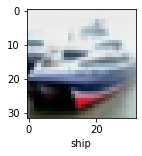

In [34]:
ytest=ytest.reshape(-1,)#convert in 1D
plot(xtest,ytest,1)

In [35]:
y_pred = cnn.predict(xtest)
y_pred[:6]
#Each element probably distribute b/w 0 and 1 and we find out the max

array([[8.11275240e-05, 8.41826317e-04, 1.10370620e-05, 9.25370753e-01,
        1.07991300e-03, 6.63269758e-02, 3.37269157e-03, 8.02517025e-06,
        2.83532264e-03, 7.22589830e-05],
       [1.03551266e-03, 3.87649611e-02, 1.38042024e-05, 8.39039330e-06,
        1.32735863e-07, 8.41166425e-08, 2.34609431e-07, 5.58939242e-08,
        9.59147930e-01, 1.02890260e-03],
       [2.82724164e-02, 3.23261786e-03, 9.67711210e-04, 3.60137550e-03,
        8.14947358e-04, 4.60762443e-04, 1.03047154e-04, 5.05026488e-04,
        9.59441364e-01, 2.60077300e-03],
       [7.48137712e-01, 5.80191910e-02, 5.89556992e-02, 2.59725074e-03,
        7.95734767e-03, 6.49384820e-05, 9.13022435e-04, 1.64594525e-03,
        1.16526723e-01, 5.18216332e-03],
       [2.35583116e-06, 1.31962324e-05, 9.57955234e-03, 3.00316652e-03,
        6.80273533e-01, 1.71896513e-03, 3.05403709e-01, 5.20523599e-06,
        5.18433900e-08, 1.79263637e-07],
       [7.46738397e-06, 4.14596798e-06, 2.14259420e-03, 1.85501594e-02,
   

In [37]:
np.argmax(y_pred[0])#gives inde of maimum element

3

In [38]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[0:5]

[3, 8, 8, 0, 4]

In [40]:
ytest[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

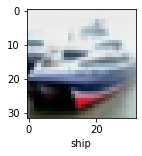

In [41]:
plot(xtest,ytest,1)

In [42]:
classes[y_pred_classes[1]]#this is predicted and xlabel above is actual

'ship'

'airplane'

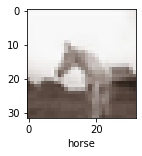

In [47]:
plot(xtest,ytest,87)
classes[y_pred_classes[87]]#As we can see here it made mistake

In [48]:
print('Classification report using cnn :\n',classification_report(ytest,y_pred_classes))#here its better

Classification report using cnn :
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.83      0.79      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.58      0.39      0.46      1000
           4       0.52      0.79      0.63      1000
           5       0.65      0.51      0.58      1000
           6       0.69      0.82      0.75      1000
           7       0.72      0.77      0.74      1000
           8       0.84      0.76      0.80      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

